# visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from forecastingGDP.data import get_data,get_series_info,clear_cache
import seaborn as sns

In [2]:
df = get_data(frequency='q', use_cache=True)

In [3]:
data_info=[]
for i in df.columns:
    data_info.append(get_series_info(i))
data_info=pd.DataFrame(data_info)

In [4]:
data_info=pd.DataFrame(data_info)
data_info[['id','title']]                    

,id,title
0,GDPC1,Real Gross Domestic Product
1,INDPRO,Industrial Production: Total Index
2,ATLSBUSRGEP,Business Expectations: Sales Revenue Growth
3,TCU,Capacity Utilization: Total Index
4,AMTMNO,Manufacturers' New Orders: Total Manufacturing
5,DGORDER,Manufacturers' New Orders: Durable Goods
6,CFNAI,Chicago Fed National Activity Index
7,UMCSENT,University of Michigan: Consumer Sentiment
8,MARTSMPCSM44000USS,Advance Retail Sales: Retail Trade
9,DSPIC96,Real Disposable Personal Income


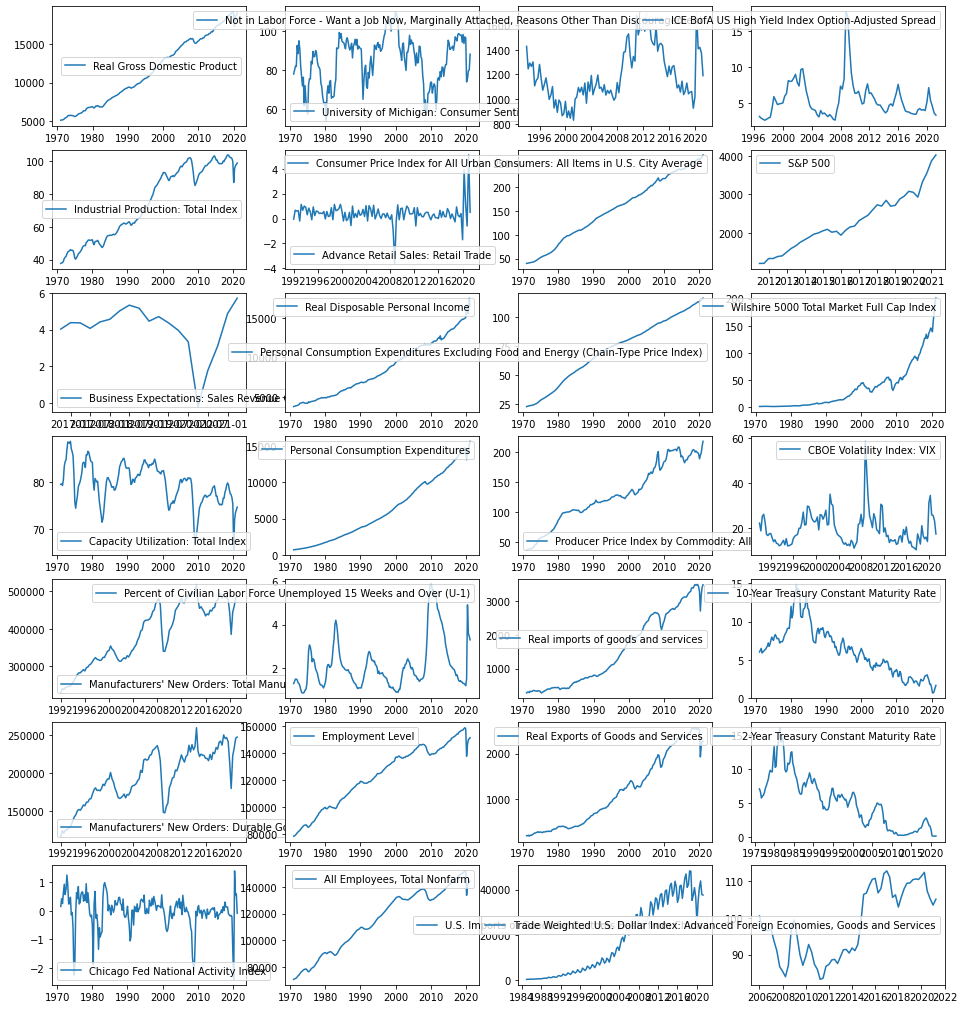

In [5]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 18))
k=0
for j in  [0,1,2,3]:
    for i in [0,1,2,3,4,5,6]:       
        axes[i,j].plot(df.index, df[df.columns[k]], label=data_info.title[k])
        axes[i,j].legend()
        k+=1

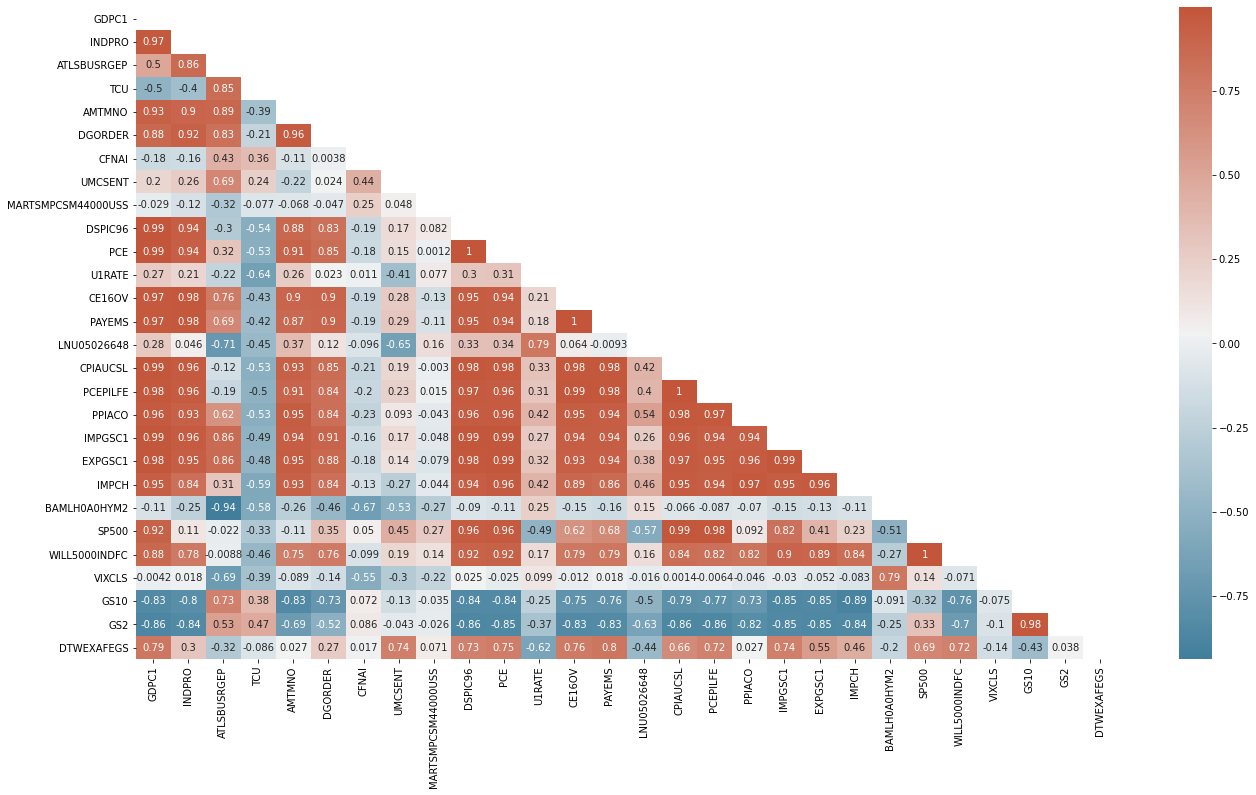

In [6]:
corr = df.corr()
f, ax = plt.subplots(figsize=(22, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

## growth

In [7]:
df_growth=df[['GDPC1','INDPRO','ATLSBUSRGEP','TCU','AMTMNO','DGORDER','CFNAI','UMCSENT','MARTSMPCSM44000USS']]

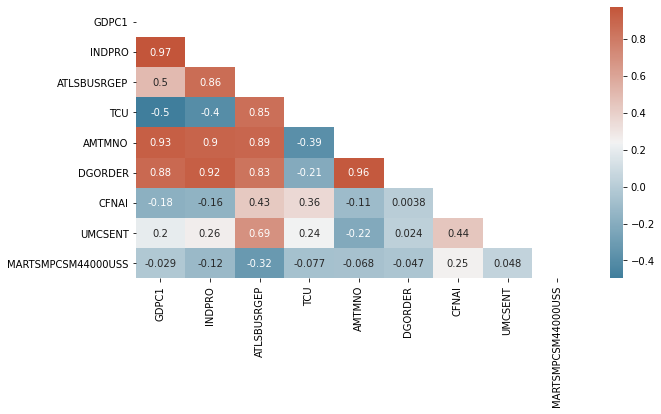

In [8]:
corr = df_growth.corr()
f, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

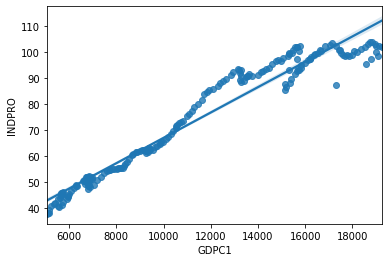

In [9]:
sns.regplot(y='INDPRO',x='GDPC1',  data=df);

## price

In [10]:
df_price=df[['DSPIC96','PCE','CPIAUCSL','PCEPILFE','PPIACO','IMPGSC1','EXPGSC1','IMPCH']]

In [11]:
df_price=df_price.drop(columns=['PCE','PCEPILFE','IMPGSC1','EXPGSC1','IMPCH'])
#keep 'DSPIC96','CPIAUCSL','PPIACO'
#df_price=df[['DSPIC96','PPIACO','CPIAUCSL']]

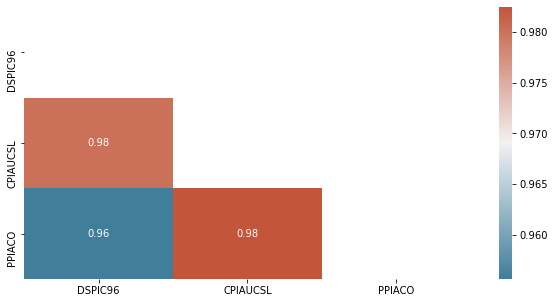

In [12]:
corr = df_price.corr()
f, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

## employ

In [13]:
df_employ=df[['U1RATE','CE16OV','PAYEMS','LNU05026648']]


In [14]:
df_employ=df_employ.drop(columns=['CE16OV'])

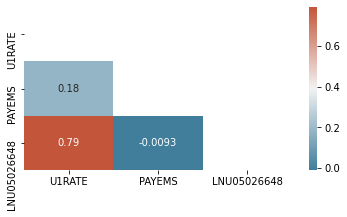

In [15]:
corr = df_employ.corr()
f, ax = plt.subplots(figsize=(6, 3))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

## financials

In [16]:
df_fin=df[['BAMLH0A0HYM2','SP500','WILL5000INDFC','VIXCLS','GS10','GS2','DTWEXAFEGS']]

In [17]:
df_fin=df_fin.drop(columns=['SP500','GS2'])

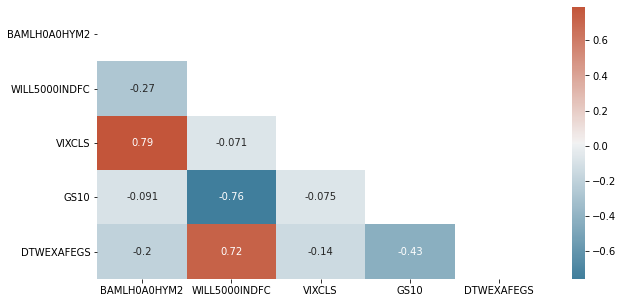

In [18]:
corr = df_fin.corr()
f, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);


## Final DF

In [19]:
df_final=df.drop(columns=['PCE','PCEPILFE','IMPGSC1','EXPGSC1','IMPCH','CE16OV','SP500','GS2'])

In [20]:
df_final=df_final.drop(columns=['ATLSBUSRGEP','MARTSMPCSM44000USS','VIXCLS','DTWEXAFEGS'])

In [21]:
df_final.columns

Index(['GDPC1', 'INDPRO', 'TCU', 'AMTMNO', 'DGORDER', 'CFNAI', 'UMCSENT',
       'DSPIC96', 'U1RATE', 'PAYEMS', 'LNU05026648', 'CPIAUCSL', 'PPIACO',
       'BAMLH0A0HYM2', 'WILL5000INDFC', 'GS10'],
      dtype='object')

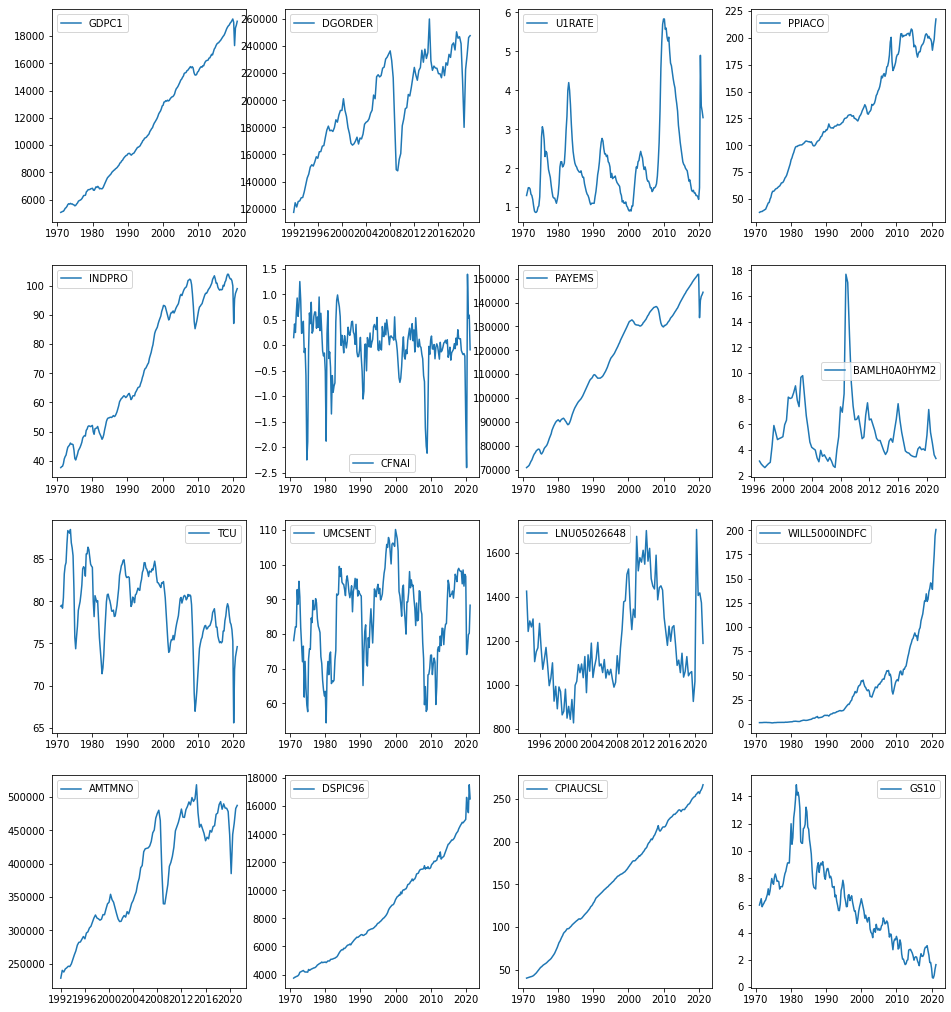

In [22]:

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 18))
k=0
for j in  [0,1,2,3]:
    for i in [0,1,2,3]:       
        axes[i,j].plot(df_final.index, df_final[df_final.columns[k]], label=df_final.columns[k])
        axes[i,j].legend()
        k+=1        
        


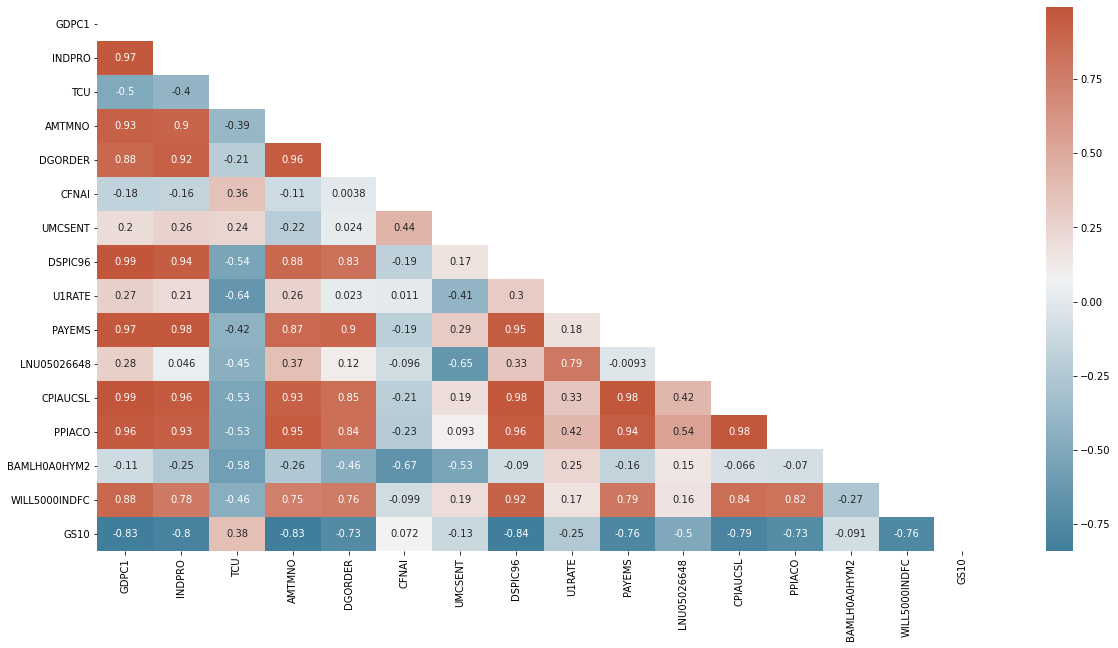

In [24]:
corr = df_final.corr()
f, ax = plt.subplots(figsize=(20, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);